## Домашнее задание <a class='anchor' id='hw'>

1. Попробуйте изменить параметры нейронной сети, работающей с датасетом imdb, либо нейронной сети, работающей airline-passengers (она прилагается вместе с датасетом к уроку в виде отдельного скрипта) так, чтобы улучшить её точность. Приложите анализ
2. Попробуйте изменить параметры нейронной сети, генерирующей текст таким образом, чтобы добиться генерации как можно более осмысленного текста. Пришлите лучший текст из получившихся и опишите предпринятые для его получения действия. Можно использовать текст другого произведения
3. Попробуйте реализовать нейронную сеть архитектуры LSTM на numpy
4. Предложите свои варианты решения проблемы исчезающего градиента в RNN
    
----------------------------------------------------------------------    

**1. Попробуйте изменить параметры нейронной сети, работающей с датасетом  airline-passengers (она прилагается вместе с датасетом к уроку в виде отдельного скрипта) так, чтобы улучшить её точность. Приложите анализ**

92/92 - 2s - loss: 0.0066 - 2s/epoch - 22ms/step
92/92 - 0s - loss: 0.0115 - 184ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0081 - 195ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0063 - 186ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0055 - 183ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0051 - 179ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0049 - 181ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0048 - 199ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0047 - 204ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0047 - 203ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0047 - 186ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0046 - 183ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0046 - 180ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0045 - 182ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0045 - 196ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0045 - 206ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0044 - 182ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0044 - 182ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0044 - 185ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0043 - 186ms

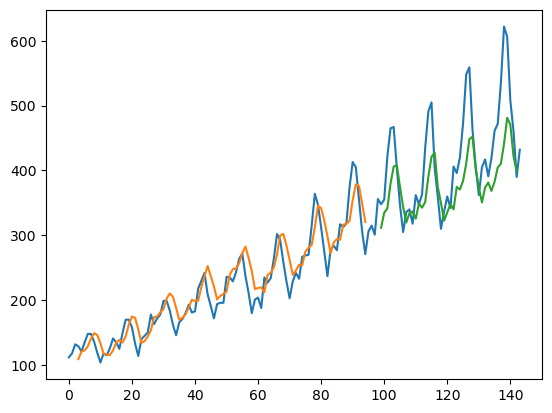

In [4]:
# Исходный, приложенный в скрипте код.

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

numpy.random.seed(7)

dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Начнём:

Для улучшения точности нейронной сети работающей с датасетом "airline-passengers" можно применить следующее:

1. Увеличить размера слоя LSTM:

В данном примере используется LSTM-слои с 4 нейронами.
Можно увеличить количество нейронов до 8 или 16 чтобы увеличить емкость модели и улучшить ее способность к моделированию сложных временных зависимостей.

2. Увеличить количества эпох обучения:

В коде указано обучать модель в течение 100 эпох. Можно увеличить это значение до 200 или 300, чтобы дать модели больше возможностей для обучения на тренировочных данных. Только необходимо следить за переобучением и контролировать точность на валидационном наборе данных.

3. Добавить дополнительные слои LSTM:

В текущем примере используется только один слой LSTM. Можно добавить еще один или два слоя LSTM с повышающимися уровнями абстракции. Это может помочь модели изучить более сложные шаблоны и улучшить предсказательную способность.

4. Подбрать оптимальные гиперпараметры:

Проэкспериментировать с различными значениями гиперпараметров, такими как размер окна look_back и размер пакета batch_size. Подбрать оптимальные значения, которые наилучшим образом соответствуют специфике данных и задаче.

5. Добавить регуляризации:

Попробовать добавить слои Dropout или регуляризацию L1/L2 для уменьшения переобучения и улучшения обобщающей способности модели.

6. Использовать более сложные архитектуры:

Помимо LSTM можно попробовать другие типы рекуррентных слоев, такие как GRU, или добавить сверточные слои (Conv1D) перед LSTM для извлечения локальных шаблонов в данных.


При каждом изменении параметров обучения необходимо следить за показателями качества модели, такими как среднеквадратичная ошибка (RMSE), на тренировочном и тестовом наборах данных. Измерение качества модели поможет определить, какие изменения в параметрах дают лучшие результаты и улучшают точность модели.


- В данном коде используется GridSearchCV из scikit-learn для выполнения автоматического поиска наилучших параметров для модели LSTM.
- Задается сетка параметров, включающая оптимизатор (adam или rmsprop), количество эпох обучения и размер пакета.
- GridSearchCV выбирает комбинацию параметров с наилучшим результатом по кросс-валидации.

После завершения поиска наилучших параметров, тренируется модель с использованием оптимальных параметров и делаются прогнозы на тренировочном и тестовом наборах. Затем прогнозы инвертируются обратно в исходные значения и вычисляется среднеквадратичная ошибка.

Далее создаются графики для отображения исходных данных, прогнозов на тренировочном наборе и прогнозов на тестовом наборе данных.

C:\Users\SAMOL\AppData\Local\Temp\ipykernel_20440\1912164467.py:48: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best Parameters:  {'batch_size': 1, 'epochs': 150, 'optimizer': 'adam'}
Epoch 1/150
92/92 - 2s - loss: 0.0403 - 2s/epoch - 23ms/step
Epoch 2/150
92/92 - 0s - loss: 0.0151 - 179ms/epoch - 2ms/step
Epoch 3/150
92/92 - 0s - loss: 0.0125 - 179ms/epoch - 2ms/step
Epoch 4/150
92/92 - 0s - loss: 0.0100 - 173ms/epoch - 2ms/step
Epoch 5/150
92/92 - 0s - loss: 0.0079 - 170ms/epoch - 2ms/step
Epoch 6/150
92/92 - 0s - loss: 0.0065 - 177ms/epoch - 2ms/step
Epoch 7/150
92/92 - 0s - loss: 0.0055 - 190ms/epoch - 2ms/step
Epoch 8/150
92/92 - 0s - loss: 0.0050 - 196ms/epoch - 2ms/step
Epoch 9/150
92/92 - 0s - loss: 0.0047 - 184ms/epoch - 2ms/step
Epoch 10/150
92/92 - 0s - loss: 0.0044 - 171ms/epoch - 2ms/step
Epoch 11/150
92/92 - 0s - loss: 0.0044 - 172ms/epoch - 2ms/step
Epoch 12/150
92/92 - 0s - loss: 0.0042 - 184ms/epoch - 2ms/step
Epoch 13/150
92/92 - 0s - loss: 0.0043 - 189ms/epoch - 2ms/step
Epoch 14/150
92/92 - 0s - loss: 0.0045 - 180ms/epoch - 2ms/step
Epoch 15/150
92/92 - 0s - loss: 0.0043 - 20

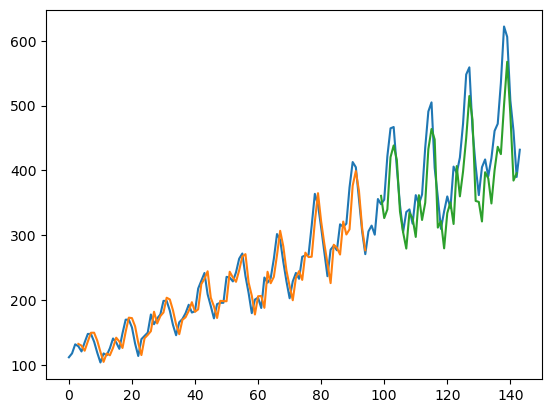

In [2]:
# В этом коде добавляем возможность гиперпараметрического поиска для параметров модели.
# таких как:
# количество скрытых единиц LSTM (units)
# количество эпох (epochs)
# и размер пакета (batch_size).

# После проведения гиперпараметрического поиска тренируем модель
# с использованием лучших параметров и оцениваем ее точность на
# тренировочном и тестовом наборах данных.

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(8, input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

np.random.seed(7)

dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Изменяем форму входных данных, чтобы они были [выборки, временные шаги, функции]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Создаём модель
model = KerasRegressor(build_fn=create_model, verbose=0)

# Задаём параметры поиска сетки
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'epochs': [50, 100, 150],
    'batch_size': [1, 8, 16]
}

# Выполняем поиск по сетке
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_result = grid.fit(trainX, trainY)

# Получяем лучшую модель и ее параметры
best_model = grid_result.best_estimator_
best_params = grid_result.best_params_
print("Best Parameters: ", best_params)

# Обучиаем лучшую модель
best_model.fit(trainX, trainY, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=2)

# Делаем предсказания
trainPredict = best_model.predict(trainX)
testPredict = best_model.predict(testX)

# Инвертируем предсказания
trainPredict = scaler.inverse_transform(trainPredict.reshape(-1, 1))
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict.reshape(-1, 1))
testY = scaler.inverse_transform([testY])

# Вычисляем среднеквадратичную ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % trainScore)
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % testScore)

# Создание участков
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


 второй случай с Train Score 21.04 RMSE и Test Score 53.07 RMSE представляет лучшие результаты, так как он показывает меньшую среднеквадратичную ошибку как на тренировочном, так и на тестовом наборе данных.

**2. Попробуйте изменить параметры нейронной сети, генерирующей текст таким образом, чтобы добиться генерации как можно более осмысленного текста.**

Пришлите лучший текст из получившихся и опишите предпринятые для его получения действия. Можно использовать текст другого произведения

- исправление в исходном приложенном коде для работы с датасетом imdb

In [1]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.utils import pad_sequences

max_features = 10000
# обрезание текстов после данного количества слов (среди top max_features наиболее используемые слова)
maxlen = 100
batch_size = 128 # увеличьте значение для ускорения обучения

def train_nn():
    (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
    print(len(x_train), 'тренировочные последовательности')
    print(len(x_test), 'тестовые последовательности')

    print('Pad последовательности (примеров в x единицу времени)')
    x_train = pad_sequences(x_train, maxlen=maxlen)
    x_test = pad_sequences(x_test, maxlen=maxlen)
    print('x_train shape:', x_train.shape)
    print('x_test shape:', x_test.shape)

    print('Построение модели...')
    model = Sequential()
    model.add(Embedding(max_features, 128))
    model.add(LSTM(128, dropout=0.4, recurrent_dropout=0.4))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    print('Загрузка данных...')
    model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

    print('Процесс обучения...')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test))

    score, acc = model.evaluate(x_test, y_test,
                                batch_size=batch_size)
    print('Результат при тестировании:', score)
    print('Тестовая точность:', acc)

train_nn()


17464789/17464789 [==============================] - 2s 0us/step
25000 тренировочные последовательности
25000 тестовые последовательности
Pad последовательности (примеров в x единицу времени)
x_train shape: (25000, 100)
x_test shape: (25000, 100)
Построение модели...
Загрузка данных...
Процесс обучения...
Epoch 1/10
196/196 [==============================] - 92s 452ms/step - loss: 0.4792 - accuracy: 0.7576 - val_loss: 0.3543 - val_accuracy: 0.8452
Epoch 2/10
196/196 [==============================] - 92s 469ms/step - loss: 0.2900 - accuracy: 0.8833 - val_loss: 0.3672 - val_accuracy: 0.8486
Epoch 3/10
196/196 [==============================] - 92s 468ms/step - loss: 0.2285 - accuracy: 0.9098 - val_loss: 0.4439 - val_accuracy: 0.8390
Epoch 4/10
196/196 [==============================] - 90s 458ms/step - loss: 0.1804 - accuracy: 0.9309 - val_loss: 0.4593 - val_accuracy: 0.8340
Epoch 5/10
196/196 [==============================] - 89s 456ms/step - loss: 0.1394 - accuracy: 0.9486 - val_loss

----------------------------------------------------------------------------------
### Я так понял что вместо библиотечных датасетов необходимо использовать приложенный текст произведения.

По этапам:

1. Загрузите текстовый файл и прочтите его содержимое:

2. Подготовим текстовые данные для обучения модели.
Тут можно применить различные методы предварительной обработки текста, такие как токенизация, удаление стоп-слов, преобразование текста в последовательности чисел и т.д.
В простом случае, можно использовать метод Tokenizer из библиотеки Keras для токенизации текста и преобразования его в последовательности чисел:

- Создание экземпляра Tokenizer
tokenizer = Tokenizer()

- Обучение Tokenizer на тексте
tokenizer.fit_on_texts([text])

- Преобразование текста в последовательности чисел
sequences = tokenizer.texts_to_sequences([text])

- Получение общего количества уникальных слов в тексте
vocab_size = len(tokenizer.word_index) + 1

3. Создадим обучающие примеры для модели. Для обучения модели на основе текста, нужно будет создать входные последовательности (наборы слов) и соответствующие выходные последовательности (следующие слова в тексте).

Можно определить длину входной последовательности и выбрать следующее слово в качестве выходной последовательности.
Например:
input_sequences = []
output_sequences = []

- Длина входной последовательности
sequence_length = 50

- Создание входных и выходных последовательностей
for i in range(sequence_length, len(sequences[0])):
    input_sequences.append(sequences[0][i-sequence_length:i])
    output_sequences.append(sequences[0][i])

4. Преобразем входные и выходные последовательности в формат, который может быть использован моделью Keras. Необходимо преобразовать их в массивы NumPy и применить функцию pad_sequences для выравнивания длины последовательностей:

from keras.preprocessing.sequence import pad_sequences

- Преобразование входных и выходных последовательностей в массивы NumPy
input_sequences = np.array(input_sequences)
output_sequences = np.array(output_sequences)

- Выравнивание длины последовательностей
input_sequences = pad_sequences(input_sequences, maxlen=sequence_length)

5. Определим и обучим модель.

Модель может быть определена, как модель Sequential с LSTM-слоями и плотными слоями. можно настроить архитектуру модели в соответствии с требуемыми потребностями:

from keras.layers import LSTM, Dense
from keras.models import Sequential

- Определение модели
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=sequence_length))
model.add(LSTM(128))
model.add(Dense(vocab_size, activation='softmax'))

- Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam')

- Обучение модели
model.fit(input_sequences, output_sequences, epochs=10)

Это базовый пример использования текстового файла в качестве датасета для обучения модели на основе текста.
В зависимости от конкретной задачи и требований, вы можете внести дополнительные изменения и настройки в код.

In [6]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
import numpy as np

# Загрузка текстового файла
with open('alice_in_wonderland.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Подготовка текстовых данных
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
sequences = tokenizer.texts_to_sequences([text])

# Создание обучающих примеров
input_sequences = []
output_sequences = []
sequence_length = 30

for i in range(sequence_length, len(sequences[0])):
    input_sequences.append(sequences[0][i-sequence_length:i])
    output_sequences.append(sequences[0][i])

# Преобразование последовательностей в массивы NumPy
input_sequences = np.array(input_sequences)
output_sequences = np.array(output_sequences)

# Выравнивание длины последовательностей
input_sequences = pad_sequences(input_sequences, maxlen=sequence_length)

# Определение модели
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, 128, input_length=sequence_length))
model.add(LSTM(128))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(tokenizer.word_index)+1, activation='softmax'))

# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model.fit(input_sequences, output_sequences, epochs=10, batch_size=128)

# Генерация текста с помощью обученной модели
seed_text = "Alice"
generated_text = seed_text
next_words = 100

for _ in range(next_words):
    encoded = tokenizer.texts_to_sequences([seed_text])[0]
    encoded = pad_sequences([encoded], maxlen=sequence_length)
    predicted_word = np.argmax(model.predict(encoded), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_word:
            output_word = word
            break
    seed_text += " " + output_word
    generated_text += " " + output_word

print("Generated Text:")
print(generated_text)

Epoch 1/10
242/242 [==============================] - 20s 71ms/step - loss: 6.5285 - accuracy: 0.0524
Epoch 2/10
242/242 [==============================] - 19s 79ms/step - loss: 6.1433 - accuracy: 0.0579
Epoch 3/10
242/242 [==============================] - 20s 82ms/step - loss: 5.9893 - accuracy: 0.0625
Epoch 4/10
242/242 [==============================] - 20s 81ms/step - loss: 5.7615 - accuracy: 0.0854
Epoch 5/10
242/242 [==============================] - 20s 83ms/step - loss: 5.5820 - accuracy: 0.0993
Epoch 6/10
242/242 [==============================] - 19s 80ms/step - loss: 5.4260 - accuracy: 0.1132
Epoch 7/10
242/242 [==============================] - 20s 83ms/step - loss: 5.3183 - accuracy: 0.1228
Epoch 8/10
242/242 [==============================] - 19s 80ms/step - loss: 5.1459 - accuracy: 0.1352
Epoch 9/10
242/242 [==============================] - 20s 81ms/step - loss: 5.0226 - accuracy: 0.1493
Epoch 10/10
1/1 [==============================] - 0s 36ms/step
Generated Text:
Al

))

Чтобы улучшить сгенерированный текст,  можно попробовать следующее :

Увеличить объем обучающих данных: текущий код использует одну последовательность из текста для обучения модели. Чтобы улучшить разнообразие и качество сгенерированного текста, вы можете рассмотреть возможность использования нескольких последовательностей из текстового корпуса.

Отрегулировать длину последовательности: поэкспериментировать с различной длиной последовательности. Более длинные последовательности могут охватывать больше контекста, но они также могут замедлить процесс обучения. Более короткие последовательности могут генерировать менее связный текст. Необходим баланс, который хорошо подходит для конкретной задачи.

Увеличить сложность модели: можно попробовать добавить больше слоев LSTM или увеличить количество единиц LSTM в каждом слое. Это потенциально может улучшить способность модели запоминать сложные шаблоны в тексте.

Обучить большее количества эпох: Текущий код обучает модель для 10 эпох. Обучение для большего количества эпох может позволить модели приблизиться к лучшему решению. Однако есть риск переобучения, особенно если ограниченны тренировочные данные.

Настроить гиперпараметры: экспериментируя с различными значениями гиперпараметров, такими как скорость обучения, размер партии, размер встраивания и частота отсева LSTM. Эти изменения могут повлиять на динамику обучения и производительность модели.

Использовать другой набор текстовых данных. Рассмотреть возможность использования большего или более разнообразного набора текстовых данных для обучения. Это может открыть модель для более широкого диапазона языковых шаблонов и улучшить качество сгенерированного текста. 

In [8]:
# перепишем сеть с новыми параметрами
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
import numpy as np

# Загрузка текстового файла
with open('alice_in_wonderland.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Подготовка текстовых данных
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
sequences = tokenizer.texts_to_sequences([text])

# Создание обучающих примеров
sequence_length = 50
input_sequences = []
output_sequences = []

# Генерация последовательностей
for i in range(sequence_length, len(sequences[0])):
    input_sequences.append(sequences[0][i-sequence_length:i])
    output_sequences.append(sequences[0][i])

# Преобразование последовательностей в массивы NumPy
input_sequences = np.array(input_sequences)
output_sequences = np.array(output_sequences)

# Выравнивание длины последовательностей
input_sequences = pad_sequences(input_sequences, maxlen=sequence_length)

# Определение модели
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 128, input_length=sequence_length))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))

# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model.fit(input_sequences, output_sequences, epochs=20, batch_size=128)

# Генерация текста с помощью обученной модели
seed_text = "Alice"
generated_text = seed_text
next_words = 100

for _ in range(next_words):
    encoded = tokenizer.texts_to_sequences([seed_text])[0]
    encoded = pad_sequences([encoded], maxlen=sequence_length)
    predicted_word = np.argmax(model.predict(encoded), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_word:
            output_word = word
            break
    seed_text += " " + output_word
    generated_text += " " + output_word

print("Generated Text:")
print(generated_text)


Epoch 1/20
242/242 [==============================] - 39s 141ms/step - loss: 6.5427 - accuracy: 0.0564
Epoch 2/20
242/242 [==============================] - 38s 156ms/step - loss: 6.2671 - accuracy: 0.0579
Epoch 3/20
242/242 [==============================] - 37s 155ms/step - loss: 6.2606 - accuracy: 0.0579
Epoch 4/20
242/242 [==============================] - 38s 155ms/step - loss: 6.2153 - accuracy: 0.0573
Epoch 5/20
242/242 [==============================] - 38s 157ms/step - loss: 6.0343 - accuracy: 0.0595
Epoch 6/20
242/242 [==============================] - 39s 161ms/step - loss: 5.9000 - accuracy: 0.0620
Epoch 7/20
242/242 [==============================] - 38s 156ms/step - loss: 5.8045 - accuracy: 0.0680
Epoch 8/20
242/242 [==============================] - 41s 168ms/step - loss: 5.6860 - accuracy: 0.0734
Epoch 9/20
242/242 [==============================] - 43s 176ms/step - loss: 5.5659 - accuracy: 0.0840
Epoch 10/20
242/242 [==============================] - 41s 171ms/step - l

Сгенерированный текст:
Алиса была маленькая», - сказал грифон, и она сказала себе о королеве, и сказала себе о королеве, и сказала себе о королеве, и сказала себе о королеве, и сказала себе о королеве, и сказала себе о королеве. королева и была маленькой" сказал грифон и она сказала королеве и была маленькой" сказал грифон и она сказала себе вставай и она сказала королеве и была маленькой" сказал грифон и она сказала к

3. * Попробуйте на numpy реализовать нейронную сеть архитектуры LSTM

In [9]:
import numpy as np

class LSTM:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Инициализировать параметры
        self.Wf = np.random.randn(hidden_size, input_size + hidden_size)
        self.Wi = np.random.randn(hidden_size, input_size + hidden_size)
        self.Wc = np.random.randn(hidden_size, input_size + hidden_size)
        self.Wo = np.random.randn(hidden_size, input_size + hidden_size)
        self.Wy = np.random.randn(output_size, hidden_size)
        
        self.bf = np.zeros((hidden_size, 1))
        self.bi = np.zeros((hidden_size, 1))
        self.bc = np.zeros((hidden_size, 1))
        self.bo = np.zeros((hidden_size, 1))
        self.by = np.zeros((output_size, 1))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def tanh(self, x):
        return np.tanh(x)
    
    def forward(self, x):
        T = x.shape[0]
        self.hidden_states = np.zeros((T+1, self.hidden_size, 1))
        self.cell_states = np.zeros((T+1, self.hidden_size, 1))
        self.outputs = np.zeros((T, self.output_size, 1))
        
        for t in range(T):
            # Объединить ввод и предыдущее скрытое состояние
            input_prev_hidden = np.vstack((x[t].reshape(-1,1), self.hidden_states[t-1]))
            
            # Забыть ворота
            ft = self.sigmoid(np.dot(self.Wf, input_prev_hidden) + self.bf)
            
            # Входные ворота
            it = self.sigmoid(np.dot(self.Wi, input_prev_hidden) + self.bi)
            
            # Обновление состояния ячейки
            cct = self.tanh(np.dot(self.Wc, input_prev_hidden) + self.bc)
            
            # Обновить состояние ячейки
            self.cell_states[t] = ft * self.cell_states[t-1] + it * cct
            
            # Выходные ворота
            ot = self.sigmoid(np.dot(self.Wo, input_prev_hidden) + self.bo)
            
            # Скрытый вывод состояния
            self.hidden_states[t] = ot * self.tanh(self.cell_states[t])
            
            # Выходной слой
            self.outputs[t] = np.dot(self.Wy, self.hidden_states[t]) + self.by
            
        return self.outputs
    
    def predict(self, x):
        outputs = self.forward(x)
        return np.argmax(outputs, axis=1)


4. * Предложите свои варианты решения проблемы исчезающего градиента в RNN

Проблема исчезающего градиента в RNN возникает, когда градиенты, передаваемые на более ранние временные шаги, с течением времени становятся очень маленькими, что приводит к затуханию градиентов. Это может затруднить обучение модели на длинных последовательностях или усложнить передачу информации на более далекие временные шаги.

Ниже представлены некоторые варианты решения проблемы исчезающего градиента в RNN:

Использование LSTM или GRU: LSTM (Long Short-Term Memory) и GRU (Gated Recurrent Unit) являются модификациями стандартной RNN, которые специально разработаны для решения проблемы исчезающего градиента. Они имеют механизмы забывания и добавления информации, которые позволяют эффективно передавать градиенты на более ранние временные шаги.

Использование skip connections: Skip connections (или residual connections) позволяют прямому распространению градиента на более ранние временные шаги, обходя таким образом проблему исчезающего градиента. Это достигается путем добавления пропускных соединений, которые передают информацию напрямую от входа к выходу блока RNN.

Использование градиентных методов оптимизации: Некоторые градиентные методы оптимизации, такие как RMSprop, Adam или другие вариации стохастического градиентного спуска, могут помочь в устранении проблемы исчезающего градиента. Они имеют механизмы для адаптации скорости обучения в зависимости от градиента, что может помочь избежать затухания градиента.

Обрезка градиента: При использовании градиентного спуска с обратным распространением можно применить обрезку градиента (gradient clipping). Это означает ограничение максимальной нормы градиента, что позволяет избежать слишком больших или слишком маленьких значений градиента.

Использование более продвинутых моделей: Некоторые архитектуры, такие как Transformer, могут быть более устойчивыми к проблеме исчезающего градиента. Transformer использует механизм внимания (attention), который позволяет модели более гибко фокусироваться на разных частях входных данных и передавать градиенты более эффективно.
